## Lesson-01 通过构建线性回归-理解Loss函数-梯度下降与函数拟合

## Load Dataset

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X, y = data['data'], data['target']

In [5]:
X.shape

(506, 13)

In [6]:
len(y)

506

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

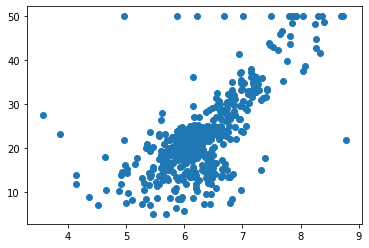

In [9]:
plt.scatter(X[:, 5], y)

## 目标：就是要找到一个“最佳的直线，来拟合卧室和房价的关系”

In [10]:
import random

In [11]:
k, b = random.randint(-100, 100) ,random.randint(-100, 100)

def func(x):
    return k * x + b

In [12]:
X_rm = X[:, 5]

In [13]:
y_hat = [func(x) for x in X_rm]

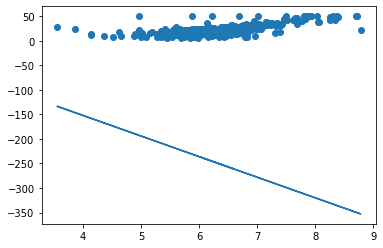

In [14]:
plt.scatter(X[:, 5], y)
plt.plot(X_rm, y_hat)

## 随机画了一根直线，结果发现，离得很远。。。😔

In [15]:
def draw_room_and_price():
    plt.scatter(X[:, 5], y)

the random k : 33, b: 37


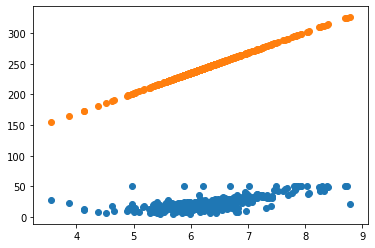

In [16]:
def price(x, k, b):
    return k * x + b

k, b = random.randint(-100, 100) ,random.randint(-100, 100)

price_by_random_k_and_b = [price(x, k, b) for x in X_rm]
print('the random k : {}, b: {}'.format(k, b))
draw_room_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 目标是想找到最好的k 和 b?

## 我们需要一个标准去衡量这个东西到底好不好

y_true, $\hat{y}$

衡量y_true, $\hat{y}$ -->  损失函数

## L1-Loss

$$ loss = \frac{1}{n} \sum_{i}^{n} | y_{ture-i} - \hat{y_{i}} | $$

In [17]:
y_true = [3, 4, 4]
y_hat = [1, 1, 4]
y_hat_2 = [3, 4, 0]

## L1-Loss值是多少呢？| 3 - 1 | + | 4 - 1 | + | 4 - 4 | = 2 + 2 + 0 = 4  

## $\hat{y_2}$ L1-Loss | 3 - 3 | + | 4 - 4 | + | 4 - 0 | = 0 + 0 + 4 = 4

## L2-Loss

$$ loss = \frac{1}{n} \sum_{i}^{n} (y_i - \hat{y_i}) ^ 2 $$

In [18]:
def loss(y, y_hat):
    sum_ = sum([(y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(y, y_hat)])
    return sum_ / len(y)

In [19]:
y_true = [3, 4, 4]
y_hat = [1, 1, 4]
y_hat_2 = [3, 4, 0]
print(loss(y_true, y_hat))
print(loss(y_true, y_hat_2))

4.333333333333333
5.333333333333333


the random k : -51, b: -97
the k : -51, b : -97 is 195466.6087858638


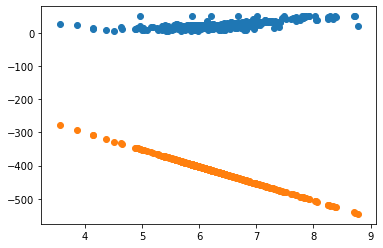

In [20]:
def price(x, k, b):
    return k * x + b

k, b = random.randint(-100, 100), random.randint(-100, 100)

price_by_random_k_and_b = [price(x, k, b) for x in X_rm]
print('the random k : {}, b: {}'.format(k, b))
draw_room_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)
cost = loss(list(y), price_by_random_k_and_b)
print('the k : {}, b : {} is {}'.format(k, b, cost))

## Loss-1 一件事情你只要知道如何评价它好与坏基本上就完成一半的工作了

## 最简单的方法，我们随机生成若干组k和b，然后找到最佳的一组k和b

In [21]:
def price(x, k, b):
    return k * x + b

trying_times = 1000

best_k, best_b = None, None

min_cost = float('inf')

losses = []

for i in range(trying_times):
    k = random.random() * 100 - 200
    b = random.random() * 100 - 200

    price_by_random_k_and_b = [price(x, k, b) for x in X_rm]
#     print('the random k : {}, b: {}'.format(k, b))
#     draw_room_and_price()
#     plt.scatter(X_rm, price_by_random_k_and_b)
    cost = loss(list(y), price_by_random_k_and_b)
    
    
    if cost < min_cost:
        min_cost = cost
        best_k, best_b = k, b
        print('在第{}, k 和 b更新了'.format(i))
        losses.append(min_cost)

在第0, k 和 b更新了
在第1, k 和 b更新了
在第2, k 和 b更新了
在第5, k 和 b更新了
在第17, k 和 b更新了
在第49, k 和 b更新了
在第73, k 和 b更新了
在第148, k 和 b更新了


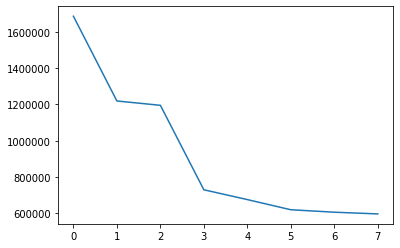

In [22]:
plt.plot(losses)

In [23]:
min_cost

596836.6932285443

In [24]:
best_k, best_b

(-100.09422366576878, -117.1236816344215)

In [25]:
def plot_by_k_and_b(k, b):
    price_by_random_k_and_b = [price(x, k, b) for x in X_rm]
    print('the random k : {}, b: {}'.format(k, b))
    draw_room_and_price()
    plt.scatter(X_rm, price_by_random_k_and_b)

the random k : -100.09422366576878, b: -117.1236816344215


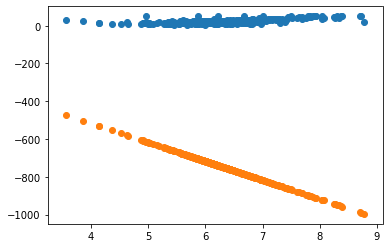

In [26]:
plot_by_k_and_b(best_k, best_b)

## 2-nd 进行方向的调整

## k的变化有两种：增大和减小
## b的变化有两种：增大和减小

k, b这一组我们进行变化，就有四种组合
当k沿着某个方向$d_n$变化的时候，如果，loss下降了，那么k和b接下来就继续沿着$d_n$这个方向走，否则，我们就换一个方向

In [27]:
driections = [
    (+1, -1),
    (+1, +1),
    (-1, -1),
    (-1, +1)
]

def price(x, k, b):
    return k * x + b

trying_times = 10000

best_k = random.random() * 100 - 200
best_b = random.random() * 100 - 200

next_direction = random.choice(driections)

min_cost = float('inf')

losses = []

scala = 0.3

for i in range(trying_times):
    
    current_direction = next_direction
    
    k_direction, b_direction = current_direction 
    
    current_k = best_k + k_direction * scala
    current_b = best_b + b_direction * scala

    price_by_random_k_and_b = [price(x, current_k, current_b) for x in X_rm]
#     print('the random k : {}, b: {}'.format(k, b))
#     draw_room_and_price()
#     plt.scatter(X_rm, price_by_random_k_and_b)
    cost = loss(list(y), price_by_random_k_and_b)
    
    
    if cost < min_cost:
        min_cost = cost
        best_k, best_b = current_k, current_b
        print('在第{}, k 和 b更新了'.format(i))
        losses.append(min_cost)
        
        next_direction = current_direction
    else:
        next_direction = random.choice(list(set(driections) - {current_direction}))

在第0, k 和 b更新了
在第1, k 和 b更新了
在第2, k 和 b更新了
在第3, k 和 b更新了
在第4, k 和 b更新了
在第5, k 和 b更新了
在第6, k 和 b更新了
在第7, k 和 b更新了
在第8, k 和 b更新了
在第9, k 和 b更新了
在第10, k 和 b更新了
在第11, k 和 b更新了
在第12, k 和 b更新了
在第13, k 和 b更新了
在第14, k 和 b更新了
在第15, k 和 b更新了
在第16, k 和 b更新了
在第17, k 和 b更新了
在第18, k 和 b更新了
在第19, k 和 b更新了
在第20, k 和 b更新了
在第21, k 和 b更新了
在第22, k 和 b更新了
在第23, k 和 b更新了
在第24, k 和 b更新了
在第25, k 和 b更新了
在第26, k 和 b更新了
在第27, k 和 b更新了
在第28, k 和 b更新了
在第29, k 和 b更新了
在第30, k 和 b更新了
在第31, k 和 b更新了
在第32, k 和 b更新了
在第33, k 和 b更新了
在第34, k 和 b更新了
在第35, k 和 b更新了
在第36, k 和 b更新了
在第37, k 和 b更新了
在第38, k 和 b更新了
在第39, k 和 b更新了
在第40, k 和 b更新了
在第41, k 和 b更新了
在第42, k 和 b更新了
在第43, k 和 b更新了
在第44, k 和 b更新了
在第45, k 和 b更新了
在第46, k 和 b更新了
在第47, k 和 b更新了
在第48, k 和 b更新了
在第49, k 和 b更新了
在第50, k 和 b更新了
在第51, k 和 b更新了
在第52, k 和 b更新了
在第53, k 和 b更新了
在第54, k 和 b更新了
在第55, k 和 b更新了
在第56, k 和 b更新了
在第57, k 和 b更新了
在第58, k 和 b更新了
在第59, k 和 b更新了
在第60, k 和 b更新了
在第61, k 和 b更新了
在第62, k 和 b更新了
在第63, k 和 b更新了
在第64, k 和 b更新了
在第65, k 和 b更新了
在第66, k 和 b更新了
在第67,

In [28]:
min_cost

61.77539227586856

In [29]:
best_k, best_b

(3.3125636816551536, 3.0030697216099487)

In [30]:
def plot_by_k_and_b(k, b):
    price_by_random_k_and_b = [price(x, k, b) for x in X_rm]
    print('the random k : {}, b: {}'.format(k, b))
    draw_room_and_price()
    plt.scatter(X_rm, price_by_random_k_and_b)

the random k : 3.3125636816551536, b: 3.0030697216099487


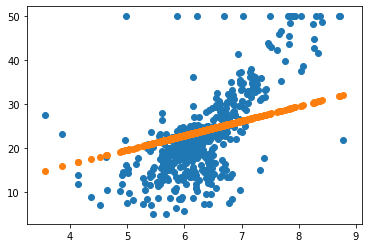

In [31]:
plot_by_k_and_b(best_k, best_b)

## 3-rd 梯度下降

## 我们能不能每一次的时候，都按照能够让它Loss减小方向走？
## 都能找到一个方向

$$ loss = \frac{1}{n} \sum_{i}^{n} (y_i - \hat{y_i}) ^ 2 $$

$$ loss = \frac{1}{n} \sum_{i}^{n} (y_i - (k * x_i + b)) ^ 2 $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b))x_i $$   $$kx_i + b = \hat{y}$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - (kx_i + b))$$   $$kx_i + b = \hat{y}$$

In [32]:
# 求k的偏导(梯度)
def partial_k(x, y, y_hat):
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
        
    return -2 / len(y) * gradient

# 求b的偏导(梯度)
def partial_b(y, y_hat):
    
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
        
    return -2 / len(y) * gradient
    

In [33]:
def price(x, k, b):
    return k * x + b

trying_times = 50000

min_cost = float('inf')

k, b = random.random() * 100 - 200, random.random() * 100 - 200

best_k, best_b = None, None

learning_rate = 1e-3

losses = []

for i in range(trying_times):

    price_by_random_k_and_b = [price(x, k, b) for x in X_rm]
    
    cost = loss(list(y), price_by_random_k_and_b)
    
    
    if cost < min_cost:
#         print('在第{}次， k 和 b更新了'.format(i))
        min_cost = cost
        best_k, best_b = k, b
        losses.append((i, min_cost))
        
    k_gradient = partial_k(X_rm, y, price_by_random_k_and_b) # 变化的方向
    b_gradient = partial_b(y, price_by_random_k_and_b)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate

In [34]:
len(losses)

50000

In [35]:
min_cost

56.557733118853065

In [36]:
best_k, best_b

(14.200147391189102, -67.09984472038475)

In [37]:
def plot_by_k_and_b(k, b):
    price_by_random_k_and_b = [price(x, k, b) for x in X_rm]
    print('the random k : {}, b: {}'.format(k, b))
    draw_room_and_price()
    plt.scatter(X_rm, price_by_random_k_and_b)

the random k : 14.200147391189102, b: -67.09984472038475


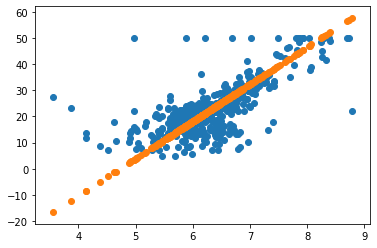

In [38]:
plot_by_k_and_b(best_k, best_b)

In [39]:
def square(x):
    return 10 * x ** 2 + 5 * x +5

In [40]:
import numpy as np

In [41]:
_X = np.linspace(-100, 100)

In [42]:
_y = [square(x) for x in _X]

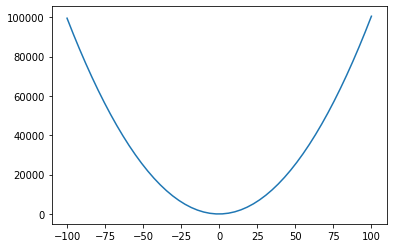

In [43]:
plt.plot(_X, _y)

## 现在使用L1-Loss函数

In [48]:
def price(x, k, b):
    return k * x + b

In [50]:
def loss(y, y_hat):
    sum_ = sum([(y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(y, y_hat)])
    return sum_ / len(y)

In [51]:
# 此处为L1-Loss函数
def loss_1(y, y_hat):
    sum_ = sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(y, y_hat))
    return sum_ / len(y)

In [46]:
# 对k 和 b求偏导， 也就是梯度
def loss_1_partial_k(x, y):
    gradient = 0
    for x_i in x:
        gradient += x_i
    return 1 / len(y) * gradient

def loss_1_partial_b(y):
    return 1 / len(y)

In [69]:
# 尝试次数
trying_time = 1000
# 初始化最小值
min_cost = float('inf')
k, b = random.random() * 100 - 200, random.random() * 100 - 200
best_k, best_b = None,None
learning_rate = 1e-3
losses = []
for i in range(trying_time):
    # 对于给定的所有的x 与之前随机的k 和 b进行求解并集合成一个列表
    price_by_k_and_b = [price(x, k, b) for x in X_rm]
    cost = loss_1(list(y), price_by_k_and_b)
    
    if min_cost > cost:
        min_cost = cost
        best_k, best_b = k, b
        losses.append((i, cost))
        
    k_gradient = loss_1_partial_k(X_rm, y)
    b_gradient = loss_1_partial_b(y)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
    

In [70]:
len(losses)

1

In [71]:
min_cost

1188.5155379790017

In [72]:
best_k, best_b

(-158.6186691573193, -169.12238899282767)

In [73]:
def plot_by_k_and_b(k, b):
    price_by_random_k_and_b = [price(x, k, b) for x in X_rm]
    print('the random k : {}, b: {}'.format(k, b))
    draw_room_and_price()
    plt.scatter(X_rm, price_by_random_k_and_b)

the random k : -164.90330354467523, b: -169.1243652774072


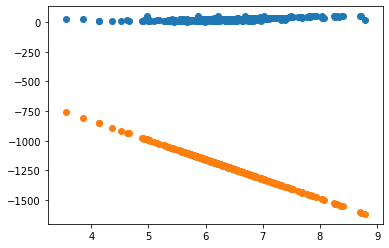

In [74]:
plot_by_k_and_b(k, b)